# Economic Impact

In [1]:
# -------------------------------------------------------------------
# Setup cell — place this at the top of every analysis notebook
# -------------------------------------------------------------------
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df = pd.read_csv("../datasets/customer_shopping_data_v10.csv")
sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

econ conf - transaction count


Monthly summary before filtering:

      month  total_transactions  econ_conf
0   2021-01                3835    96.7034
1   2021-02                3407    96.0306
2   2021-03                3813    99.4866
3   2021-04                3724    94.2098
4   2021-05                3848    92.9693
5   2021-06                3783    98.7069
6   2021-07                3984   101.7160
7   2021-08                3723   102.5933
8   2021-09                3670   104.3462
9   2021-10                3916   103.3183
10  2021-11                3798   101.4827
11  2021-12                3881    99.6648
12  2022-01                3847   102.2663
13  2022-02                3447    99.4530
14  2022-03                3947    96.5453
15  2022-04                3763    95.8011
16  2022-05                3849    98.0362
17  2022-06                3798    94.7847
18  2022-07                3893    94.3165
19  2022-08                3912    94.9434
20  2022-09                3683    94.9733
21  2022-10       

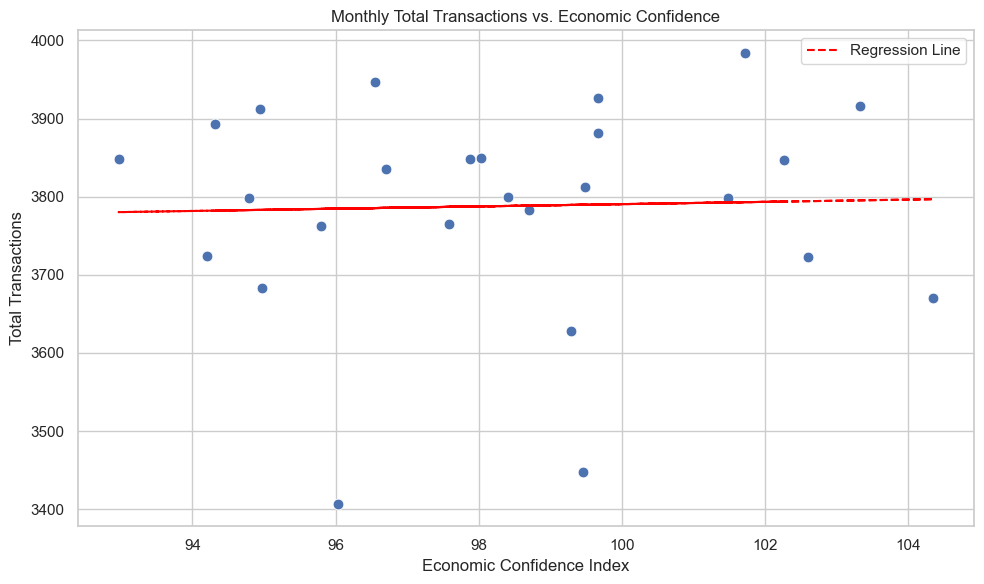

In [9]:
# does not count 03.2023 
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean")
      )
      .reset_index()
)

print("\nMonthly summary before filtering:\n")
print(monthly_summary)

monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000]

print("\nMonthly summary after removing low-count month:\n")
print(monthly_summary_clean)

X = sm.add_constant(monthly_summary_clean["econ_conf"])
y = monthly_summary_clean["total_transactions"]

model = sm.OLS(y, X).fit()

print("\nRegression summary:\n")
print(model.summary())

slope = model.params["econ_conf"]
p_value = model.pvalues["econ_conf"]

if p_value < 0.05:
    print(f"\n✅ The correlation is statistically significant. Slope = {slope:.4f}, p = {p_value:.4f}.")
else:
    print(f"\n❌ The correlation is not statistically significant. Slope = {slope:.4f}, p = {p_value:.4f}.")

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=monthly_summary_clean,
    x="econ_conf",
    y="total_transactions",
    s=60
)

y_pred = model.predict(X)

plt.plot(
    monthly_summary_clean["econ_conf"],
    y_pred,
    color="red",
    linestyle="--",
    label="Regression Line"
)

plt.title("Monthly Total Transactions vs. Economic Confidence")
plt.xlabel("Economic Confidence Index")
plt.ylabel("Total Transactions")
plt.legend()
plt.tight_layout()
plt.show()


cons conf - transaction count


Total transaction count per Cons_Conf level (2023-03 removed):

    Cons_Conf  total_transactions
0     63.3600                3798
1     67.2700                3763
2     67.5700                3849
3     68.0300                3893
4     68.9133                3881
5     71.1483                3798
6     71.1500                3447
7     72.1600                3912
8     72.3500                3683
9     72.5300                3947
10    73.2100                3847
11    75.6400                3799
12    76.1500                3848
13    76.6300                3765
14    76.7812                3916
15    77.2622                3848
16    78.2191                3723
17    79.1000                3926
18    79.4772                3984
19    79.6503                3670
20    80.1716                3724
21    81.7228                3783
22    82.5000                3628
23    83.2669                3835
24    84.5152                3407
25    86.6538                3813

Regression Summa

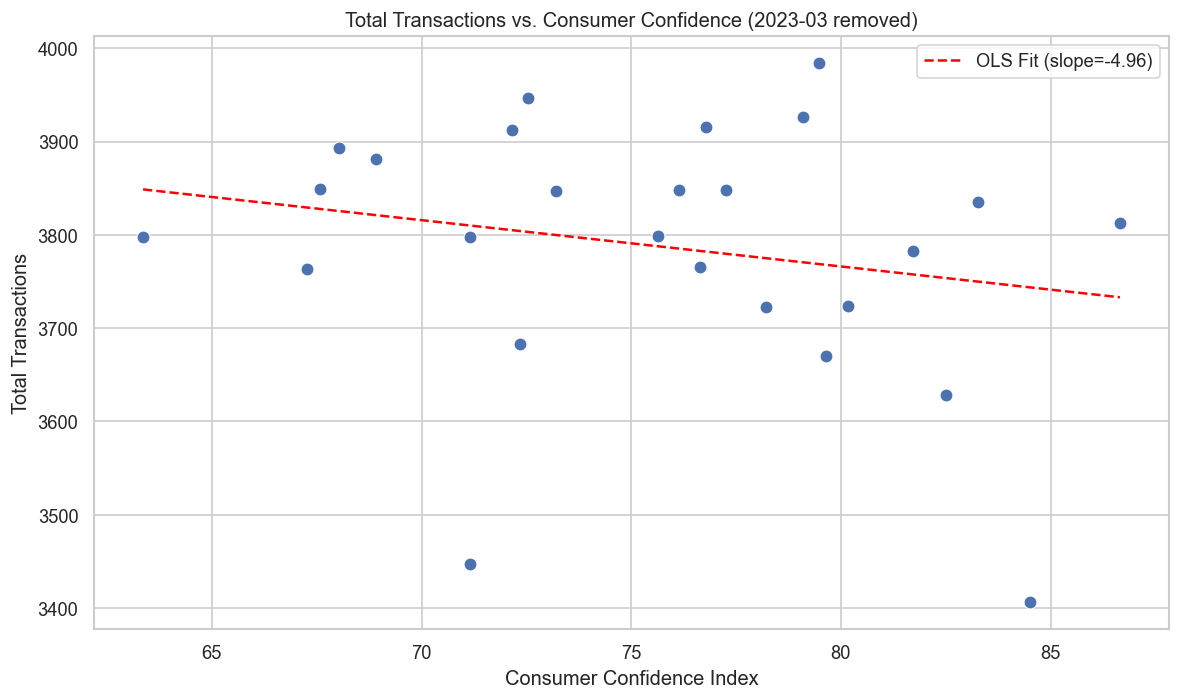

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# 2023-03 ayını çıkar
df_clean = df[df["month"] != "2023-03"]

# Group by Cons_Conf
econ_summary = (
    df_clean.groupby("Cons_Conf")
      .agg(total_transactions=("invoice_no", "count"))
      .reset_index()
      .sort_values("Cons_Conf")
)

print("\nTotal transaction count per Cons_Conf level (2023-03 removed):\n")
print(econ_summary)

# Regression
X = sm.add_constant(econ_summary["Cons_Conf"])
y = econ_summary["total_transactions"]
model = sm.OLS(y, X).fit()

print("\nRegression Summary:\n")
print(model.summary())

slope = model.params["Cons_Conf"]
pval = model.pvalues["Cons_Conf"]

# Interpretation
if pval < 0.05:
    print(f"\n✅ Consumer Confidence has a significant effect on total transaction count. Slope = {slope:.4f}, p = {pval:.4f}.")
else:
    print(f"\n❌ Consumer Confidence does not significantly affect total transaction count. Slope = {slope:.4f}, p = {pval:.4f}.")

# Plot
plt.figure(figsize=(10,6), dpi=120)

sns.scatterplot(
    data=econ_summary,
    x="Cons_Conf",
    y="total_transactions",
    s=60
)

y_pred = model.predict(X)

plt.plot(
    econ_summary["Cons_Conf"],
    y_pred,
    color="red",
    linestyle="--",
    label=f"OLS Fit (slope={slope:.2f})"
)

plt.title("Total Transactions vs. Consumer Confidence (2023-03 removed)")
plt.xlabel("Consumer Confidence Index")
plt.ylabel("Total Transactions")
plt.legend()
plt.tight_layout()
plt.show()



realsec conf - transaction count


Monthly summary:

      month  total_transactions  realsec_conf
0   2021-01                3835         109.0
1   2021-02                3407         108.7
2   2021-03                3813         110.2
3   2021-04                3724         107.4
4   2021-05                3848         107.1
5   2021-06                3783         109.8
6   2021-07                3984         112.1
7   2021-08                3723         112.2
8   2021-09                3670         113.3
9   2021-10                3916         111.3
10  2021-11                3798         112.0
11  2021-12                3881         110.1
12  2022-01                3847         111.9
13  2022-02                3447         109.9
14  2022-03                3947         108.2
15  2022-04                3763         107.7
16  2022-05                3849         107.0
17  2022-06                3798         104.6
18  2022-07                3893         102.5
19  2022-08                3912         101.4
20  2022-09    

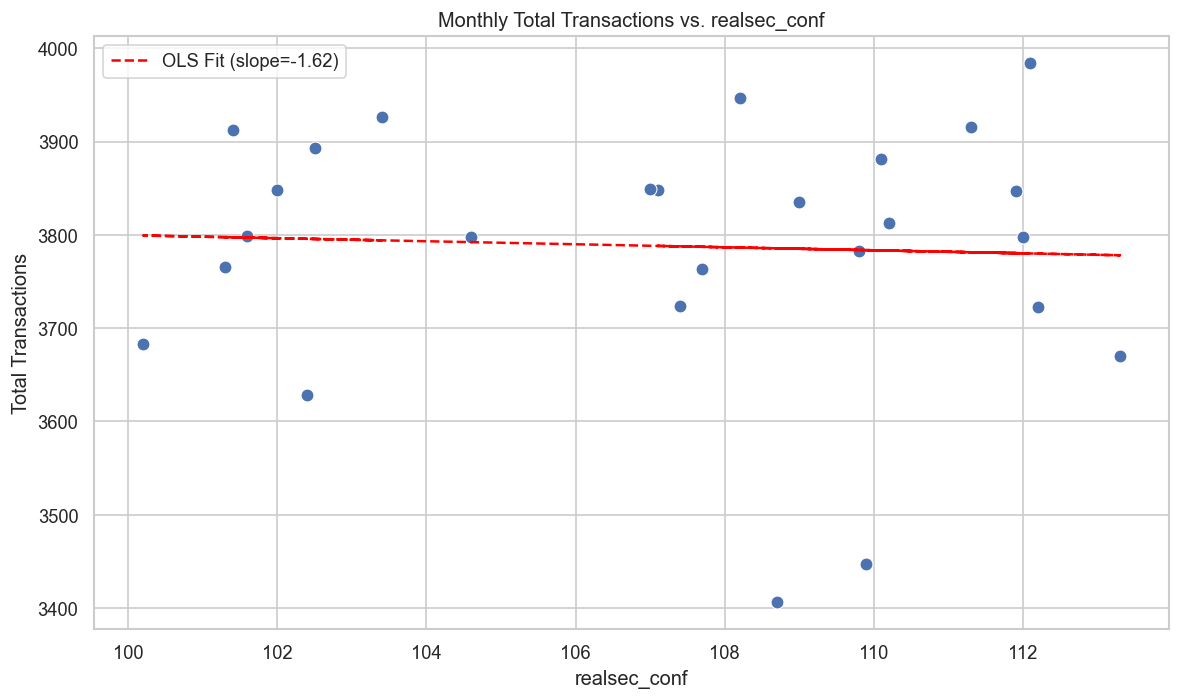

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.ticker as ticker

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

print("\nMonthly summary:\n")
print(monthly_summary)

# Loop over confidence indices
for conf_var in ["realsec_conf"]:
    print(f"\n==================== {conf_var.upper()} Analysis ====================\n")

    X = monthly_summary[conf_var]
    y = monthly_summary["total_transactions"]

    r, p_value = pearsonr(X, y)
    print(f"Pearson correlation coefficient (r): {r:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("✅ The correlation is statistically significant.")
    else:
        print("❌ The correlation is not statistically significant.")

    X_reg = sm.add_constant(X)
    model = sm.OLS(y, X_reg).fit()

    print("\nOLS Regression Summary:\n")
    print(model.summary())

    slope = model.params[conf_var]
    pval = model.pvalues[conf_var]

    if pval < 0.05:
        print(f"\n✅ {conf_var} has a significant effect on total transactions. Slope = {slope:.4f}, p = {pval:.4f}.")
    else:
        print(f"\n❌ {conf_var} does not significantly affect total transactions. Slope = {slope:.4f}, p = {pval:.4f}.")

    plt.figure(figsize=(10,6), dpi=120)
    sns.scatterplot(
        x=X,
        y=y,
        s=60
    )

    y_pred = model.predict(X_reg)

    plt.plot(
        X,
        y_pred,
        color="red",
        linestyle="--",
        label=f"OLS Fit (slope={slope:.2f})"
    )

    plt.title(f"Monthly Total Transactions vs. {conf_var}")
    plt.xlabel(conf_var)
    plt.ylabel("Total Transactions")
    plt.legend()
    plt.tight_layout()
    plt.show()


1. Econ_Conf ↔ daily_total_spend <br>



Monthly total spending after removing low-count month:

      month  total_spending  econ_conf
0   2021-01      9641614.62    96.7034
1   2021-02      8772315.22    96.0306
2   2021-03      9455359.38    99.4866
3   2021-04      9389541.54    94.2098
4   2021-05      9771756.97    92.9693
5   2021-06      9286271.35    98.7069
6   2021-07     10311119.68   101.7160
7   2021-08      9630655.70   102.5933
8   2021-09      9188165.62   104.3462
9   2021-10     10263015.06   103.3183
10  2021-11      9265555.29   101.4827
11  2021-12      9585200.16    99.6648
12  2022-01      9764311.14   102.2663
13  2022-02      8344111.92    99.4530
14  2022-03      9986685.16    96.5453
15  2022-04      9326144.44    95.8011
16  2022-05      9947574.13    98.0362
17  2022-06      9647503.95    94.7847
18  2022-07     10067602.95    94.3165
19  2022-08      9651705.59    94.9434
20  2022-09      9607629.29    94.9733
21  2022-10     10282075.37    97.8710
22  2022-11      8941584.66    97.5858
23  202

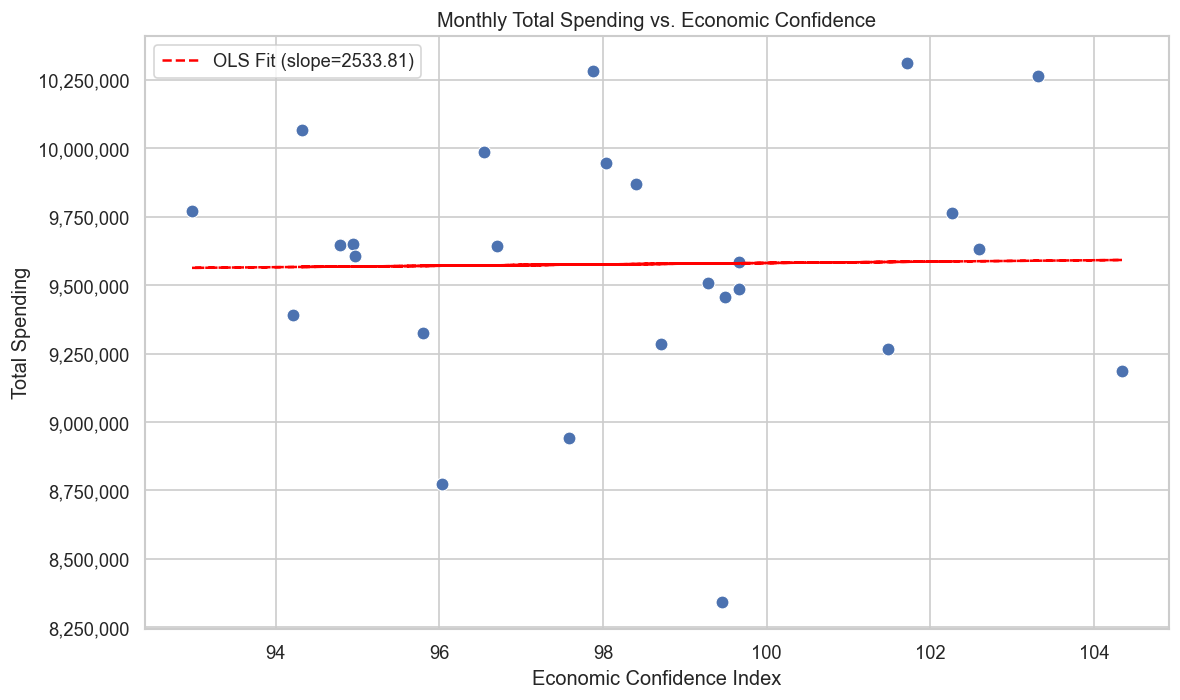

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import matplotlib.ticker as ticker

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary_spend = (
    df.groupby("month")
      .agg(
          total_spending=("total_price", "sum"),
          econ_conf=("Econ_Conf", "mean")
      )
      .reset_index()
)

monthly_summary_spend = monthly_summary_spend[monthly_summary_spend["month"] != "2023-03"]

print("\nMonthly total spending after removing low-count month:\n")
print(monthly_summary_spend)

X = monthly_summary_spend["econ_conf"]
y = monthly_summary_spend["total_spending"]

r, p_value = pearsonr(X, y)

print(f"\nPearson correlation coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ The correlation is statistically significant.")
else:
    print("❌ The correlation is not statistically significant.")

X_reg = sm.add_constant(X)
model = sm.OLS(y, X_reg).fit()

print("\nOLS Regression Summary:\n")
print(model.summary())

slope = model.params["econ_conf"]
pval = model.pvalues["econ_conf"]

if pval < 0.05:
    print(f"\n✅ Economic Confidence has a significant effect on total spending. Slope = {slope:.4f}, p = {pval:.4f}.")
else:
    print(f"\n❌ Economic Confidence does not significantly affect total spending. Slope = {slope:.4f}, p = {pval:.4f}.")

plt.figure(figsize=(10,6), dpi=120)
sns.scatterplot(
    x=X,
    y=y,
    s=60
)

y_pred = model.predict(X_reg)

plt.plot(
    X,
    y_pred,
    color="red",
    linestyle="--",
    label=f"OLS Fit (slope={slope:.2f})"
)

plt.title("Monthly Total Spending vs. Economic Confidence")
plt.xlabel("Economic Confidence Index")
plt.ylabel("Total Spending")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.tight_layout()
plt.show()


1. Cons_Conf ↔ daily_total_spend <br>



Monthly total spending after removing low-count month:

      month  total_spending  econ_conf
0   2021-01      9641614.62    83.2669
1   2021-02      8772315.22    84.5152
2   2021-03      9455359.38    86.6538
3   2021-04      9389541.54    80.1716
4   2021-05      9771756.97    77.2622
5   2021-06      9286271.35    81.7228
6   2021-07     10311119.68    79.4772
7   2021-08      9630655.70    78.2191
8   2021-09      9188165.62    79.6503
9   2021-10     10263015.06    76.7812
10  2021-11      9265555.29    71.1483
11  2021-12      9585200.16    68.9133
12  2022-01      9764311.14    73.2100
13  2022-02      8344111.92    71.1500
14  2022-03      9986685.16    72.5300
15  2022-04      9326144.44    67.2700
16  2022-05      9947574.13    67.5700
17  2022-06      9647503.95    63.3600
18  2022-07     10067602.95    68.0300
19  2022-08      9651705.59    72.1600
20  2022-09      9607629.29    72.3500
21  2022-10     10282075.37    76.1500
22  2022-11      8941584.66    76.6300
23  202

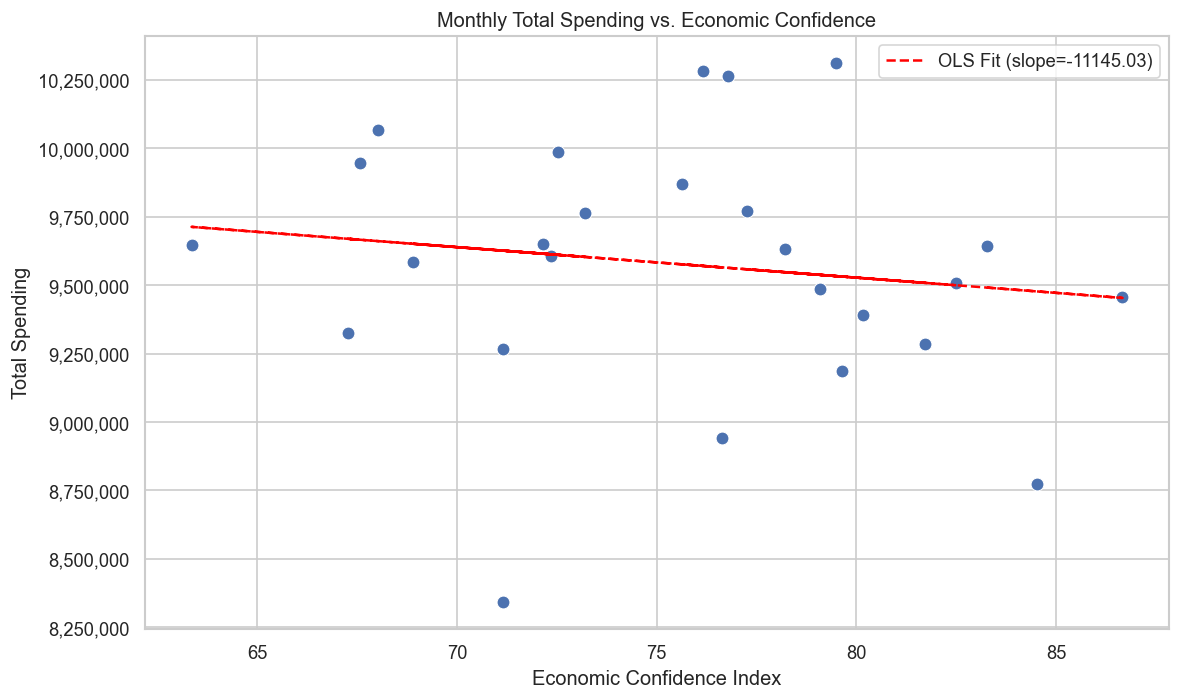

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import matplotlib.ticker as ticker

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary_spend = (
    df.groupby("month")
      .agg(
          total_spending=("total_price", "sum"),
          econ_conf=("Cons_Conf", "mean")
      )
      .reset_index()
)

monthly_summary_spend = monthly_summary_spend[monthly_summary_spend["month"] != "2023-03"]

print("\nMonthly total spending after removing low-count month:\n")
print(monthly_summary_spend)

X = monthly_summary_spend["econ_conf"]
y = monthly_summary_spend["total_spending"]

r, p_value = pearsonr(X, y)

print(f"\nPearson correlation coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ The correlation is statistically significant.")
else:
    print("❌ The correlation is not statistically significant.")

X_reg = sm.add_constant(X)
model = sm.OLS(y, X_reg).fit()

print("\nOLS Regression Summary:\n")
print(model.summary())

slope = model.params["econ_conf"]
pval = model.pvalues["econ_conf"]

if pval < 0.05:
    print(f"\n✅ Economic Confidence has a significant effect on total spending. Slope = {slope:.4f}, p = {pval:.4f}.")
else:
    print(f"\n❌ Economic Confidence does not significantly affect total spending. Slope = {slope:.4f}, p = {pval:.4f}.")

plt.figure(figsize=(10,6), dpi=120)
sns.scatterplot(
    x=X,
    y=y,
    s=60
)

y_pred = model.predict(X_reg)

plt.plot(
    X,
    y_pred,
    color="red",
    linestyle="--",
    label=f"OLS Fit (slope={slope:.2f})"
)

plt.title("Monthly Total Spending vs. Economic Confidence")
plt.xlabel("Economic Confidence Index")
plt.ylabel("Total Spending")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.tight_layout()
plt.show()

three - transaction count

In [14]:
import pandas as pd
import statsmodels.api as sm

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# 2023-03 ayını çıkar
monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

print("\nMonthly summary:\n")
print(monthly_summary)

X = sm.add_constant(monthly_summary[["econ_conf", "cons_conf", "realsec_conf"]])
y = monthly_summary["total_transactions"]

model = sm.OLS(y, X).fit()

print("\nOLS Multiple Regression Summary:\n")
print(model.summary())

# Yorumlama
pvals = model.pvalues.drop("const")
significant_vars = pvals[pvals < 0.05].index.tolist()

if significant_vars:
    print(f"\n✅ The following variables have a significant effect on total transactions: {', '.join(significant_vars)}.")
else:
    print("\n❌ None of the variables have a significant individual effect on total transactions.")

# Model genel anlamlılık yorumu
f_pval = model.f_pvalue
if f_pval < 0.05:
    print(f"✅ Overall model is statistically significant (F-test p = {f_pval:.4f}).")
else:
    print(f"❌ Overall model is not statistically significant (F-test p = {f_pval:.4f}).")



Monthly summary:

      month  total_transactions  econ_conf  cons_conf  realsec_conf
0   2021-01                3835    96.7034    83.2669         109.0
1   2021-02                3407    96.0306    84.5152         108.7
2   2021-03                3813    99.4866    86.6538         110.2
3   2021-04                3724    94.2098    80.1716         107.4
4   2021-05                3848    92.9693    77.2622         107.1
5   2021-06                3783    98.7069    81.7228         109.8
6   2021-07                3984   101.7160    79.4772         112.1
7   2021-08                3723   102.5933    78.2191         112.2
8   2021-09                3670   104.3462    79.6503         113.3
9   2021-10                3916   103.3183    76.7812         111.3
10  2021-11                3798   101.4827    71.1483         112.0
11  2021-12                3881    99.6648    68.9133         110.1
12  2022-01                3847   102.2663    73.2100         111.9
13  2022-02                34

composite index - transaction count


Monthly summary with mean confidence:

      month  total_transactions  econ_conf  cons_conf  realsec_conf  \
0   2021-01                3835    96.7034    83.2669         109.0   
1   2021-02                3407    96.0306    84.5152         108.7   
2   2021-03                3813    99.4866    86.6538         110.2   
3   2021-04                3724    94.2098    80.1716         107.4   
4   2021-05                3848    92.9693    77.2622         107.1   
5   2021-06                3783    98.7069    81.7228         109.8   
6   2021-07                3984   101.7160    79.4772         112.1   
7   2021-08                3723   102.5933    78.2191         112.2   
8   2021-09                3670   104.3462    79.6503         113.3   
9   2021-10                3916   103.3183    76.7812         111.3   
10  2021-11                3798   101.4827    71.1483         112.0   
11  2021-12                3881    99.6648    68.9133         110.1   
12  2022-01                3847   102

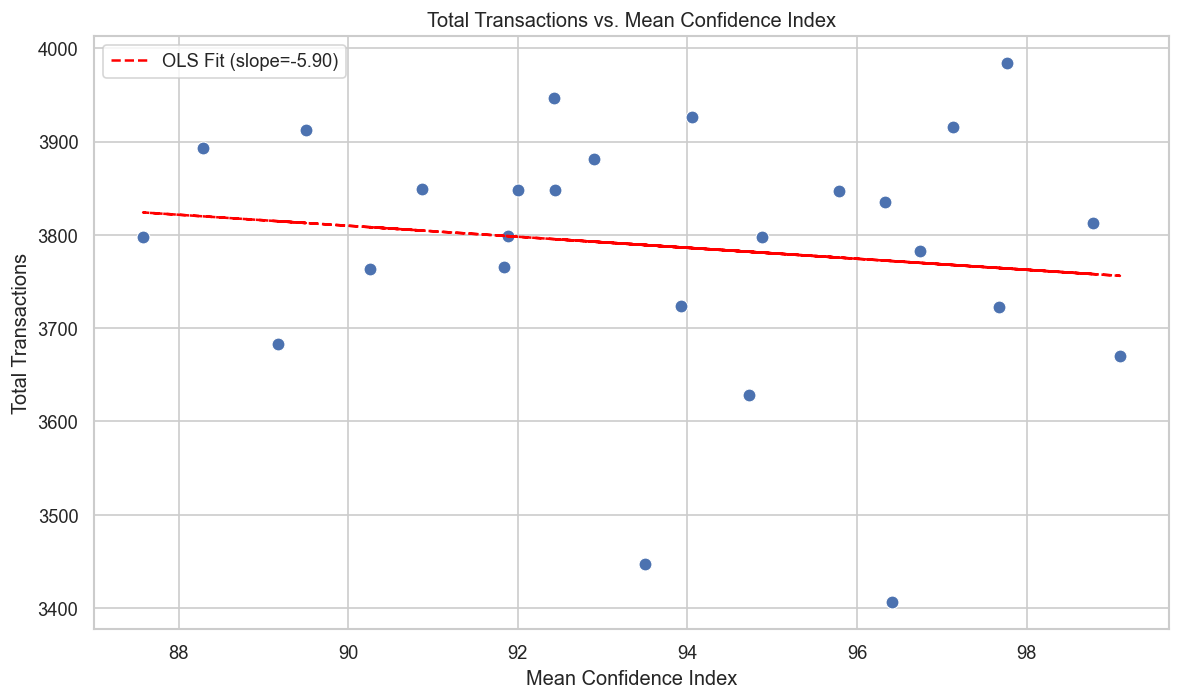

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# 2023-03 çıkar
monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

# Kompozit index
monthly_summary["mean_confidence"] = (
    monthly_summary["econ_conf"] +
    monthly_summary["cons_conf"] +
    monthly_summary["realsec_conf"]
) / 3

print("\nMonthly summary with mean confidence:\n")
print(monthly_summary)

# OLS
X = sm.add_constant(monthly_summary["mean_confidence"])
y = monthly_summary["total_transactions"]

model = sm.OLS(y, X).fit()
print("\nOLS Regression Summary:\n")
print(model.summary())

slope = model.params["mean_confidence"]
pval = model.pvalues["mean_confidence"]

# Yorum
if pval < 0.05:
    print(f"\n✅ Mean Confidence has a significant effect on total transactions. Slope = {slope:.4f}, p = {pval:.4f}.")
else:
    print(f"\n❌ Mean Confidence does not significantly affect total transactions. Slope = {slope:.4f}, p = {pval:.4f}.")

# Grafik
plt.figure(figsize=(10,6), dpi=120)
sns.scatterplot(
    x=monthly_summary["mean_confidence"],
    y=monthly_summary["total_transactions"],
    s=60
)

y_pred = model.predict(X)

plt.plot(
    monthly_summary["mean_confidence"],
    y_pred,
    color="red",
    linestyle="--",
    label=f"OLS Fit (slope={slope:.2f})"
)

plt.title("Total Transactions vs. Mean Confidence Index")
plt.xlabel("Mean Confidence Index")
plt.ylabel("Total Transactions")
plt.legend()
plt.tight_layout()
plt.show()


polynomial regression


Monthly summary with quadratic term:

      month  total_transactions  econ_conf  cons_conf  realsec_conf  \
0   2021-01                3835    96.7034    83.2669         109.0   
1   2021-02                3407    96.0306    84.5152         108.7   
2   2021-03                3813    99.4866    86.6538         110.2   
3   2021-04                3724    94.2098    80.1716         107.4   
4   2021-05                3848    92.9693    77.2622         107.1   
5   2021-06                3783    98.7069    81.7228         109.8   
6   2021-07                3984   101.7160    79.4772         112.1   
7   2021-08                3723   102.5933    78.2191         112.2   
8   2021-09                3670   104.3462    79.6503         113.3   
9   2021-10                3916   103.3183    76.7812         111.3   
10  2021-11                3798   101.4827    71.1483         112.0   
11  2021-12                3881    99.6648    68.9133         110.1   
12  2022-01                3847   102.

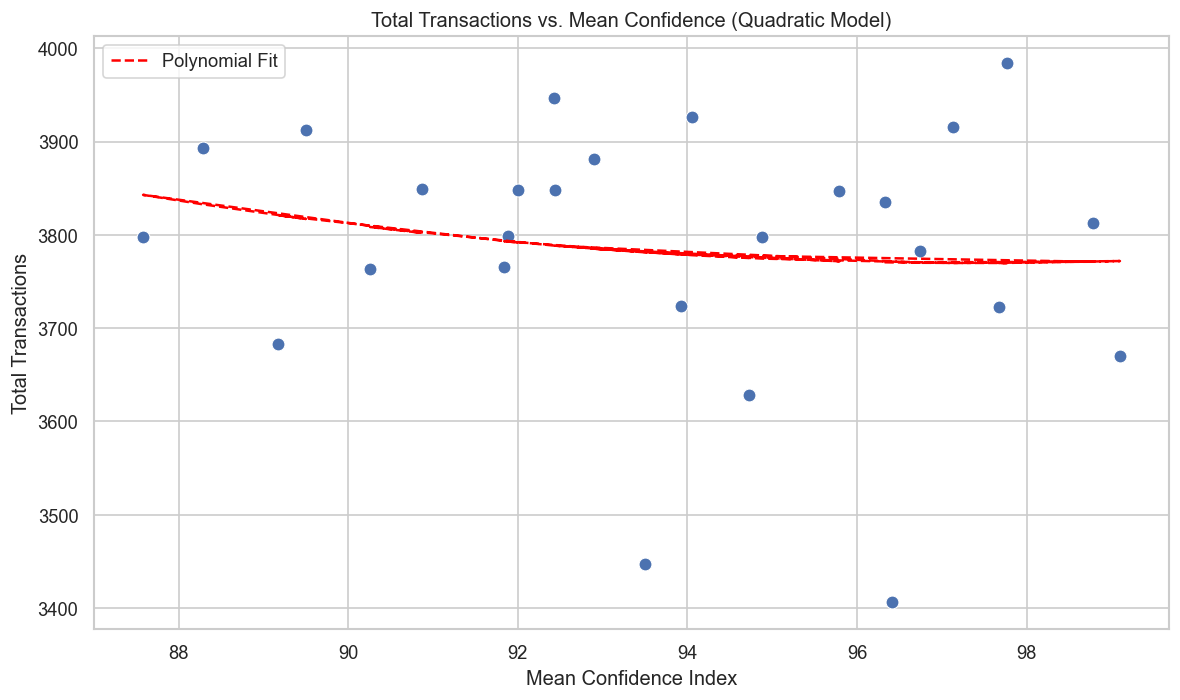

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# 2023-03 çıkar
monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

# Composite index
monthly_summary["mean_confidence"] = (
    monthly_summary["econ_conf"] +
    monthly_summary["cons_conf"] +
    monthly_summary["realsec_conf"]
) / 3

# Quadratic term
monthly_summary["mean_confidence_sq"] = monthly_summary["mean_confidence"] ** 2

print("\nMonthly summary with quadratic term:\n")
print(monthly_summary)

# OLS Polynomial Regression
X = sm.add_constant(monthly_summary[["mean_confidence", "mean_confidence_sq"]])
y = monthly_summary["total_transactions"]

model = sm.OLS(y, X).fit()

print("\nPolynomial Regression Summary:\n")
print(model.summary())

pval_linear = model.pvalues["mean_confidence"]
pval_quad = model.pvalues["mean_confidence_sq"]

if pval_linear < 0.05 or pval_quad < 0.05:
    print(f"\n✅ At least one term is statistically significant. p = {pval_linear:.4f}.")
else:
    print(f"\n❌ No significant relationship found. p = {pval_linear:.4f}.")


plt.figure(figsize=(10,6), dpi=120)

sns.scatterplot(
    x=monthly_summary["mean_confidence"],
    y=monthly_summary["total_transactions"],
    s=60
)

# Predicted values
X_pred = sm.add_constant(monthly_summary[["mean_confidence", "mean_confidence_sq"]])
y_pred = model.predict(X_pred)

plt.plot(
    monthly_summary["mean_confidence"],
    y_pred,
    color="red",
    linestyle="--",
    label="Polynomial Fit"
)

plt.title("Total Transactions vs. Mean Confidence (Quadratic Model)")
plt.xlabel("Mean Confidence Index")
plt.ylabel("Total Transactions")
plt.legend()
plt.tight_layout()
plt.show()


spline regression


Spline Regression Summary:

                            OLS Regression Results                            
Dep. Variable:     total_transactions   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.2310
Date:                Sat, 28 Jun 2025   Prob (F-statistic):              0.796
Time:                        19:29:17   Log-Likelihood:                -164.15
No. Observations:                  26   AIC:                             334.3
Df Residuals:                      23   BIC:                             338.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

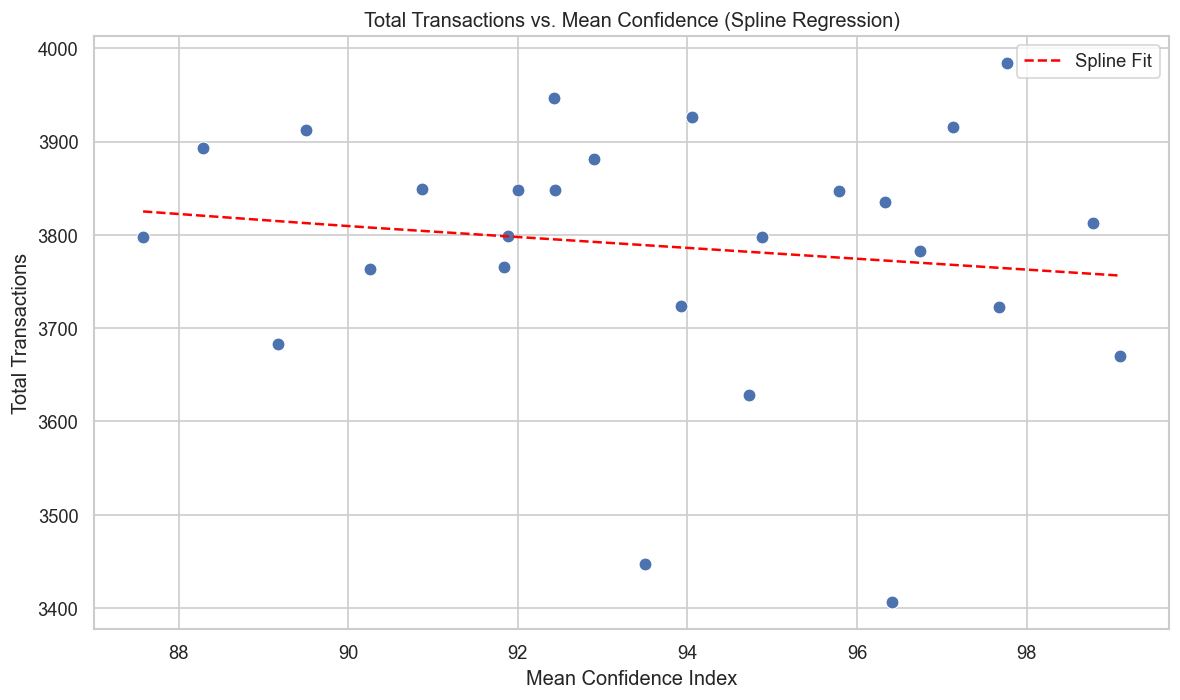

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# 2023-03 çıkar
monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

# Composite index
monthly_summary["mean_confidence"] = (
    monthly_summary["econ_conf"] +
    monthly_summary["cons_conf"] +
    monthly_summary["realsec_conf"]
) / 3

# Spline basis: breakpoint at 90
spline = dmatrix("bs(mean_confidence, knots=(90,), degree=1, include_intercept=False)",
                 data=monthly_summary, return_type='dataframe')

X = spline
y = monthly_summary["total_transactions"]

model = sm.OLS(y, X).fit()
print("\nSpline Regression Summary:\n")
print(model.summary())

pvals = model.pvalues
significant_terms = [term for term in pvals.index if (pvals[term] < 0.05 and term != "Intercept")]

if significant_terms:
    print(f"\n✅ The following spline segment slope(s) are statistically significant: {', '.join(significant_terms)}.")
else:
    if pvals["Intercept"] < 0.05:
        print("\n❌ No spline segment slopes are significant. Only intercept is significant, which simply reflects the mean level.")
    else:
        print("\n❌ No spline segments or intercept are significant.")

# Predicted values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10,6), dpi=120)
sns.scatterplot(
    x=monthly_summary["mean_confidence"],
    y=y,
    s=60
)

# Sort for smooth line
sorted_idx = monthly_summary["mean_confidence"].argsort()
plt.plot(
    monthly_summary["mean_confidence"].iloc[sorted_idx],
    y_pred.iloc[sorted_idx],
    color="red",
    linestyle="--",
    label="Spline Fit"
)

plt.title("Total Transactions vs. Mean Confidence (Spline Regression)")
plt.xlabel("Mean Confidence Index")
plt.ylabel("Total Transactions")
plt.legend()
plt.tight_layout()
plt.show()


season dummy



Monthly summary with season dummies:

      month  total_transactions  econ_conf  cons_conf  realsec_conf  \
0   2021-01                3835    96.7034    83.2669         109.0   
1   2021-02                3407    96.0306    84.5152         108.7   
2   2021-03                3813    99.4866    86.6538         110.2   
3   2021-04                3724    94.2098    80.1716         107.4   
4   2021-05                3848    92.9693    77.2622         107.1   
5   2021-06                3783    98.7069    81.7228         109.8   
6   2021-07                3984   101.7160    79.4772         112.1   
7   2021-08                3723   102.5933    78.2191         112.2   
8   2021-09                3670   104.3462    79.6503         113.3   
9   2021-10                3916   103.3183    76.7812         111.3   
10  2021-11                3798   101.4827    71.1483         112.0   
11  2021-12                3881    99.6648    68.9133         110.1   
12  2022-01                3847   102.

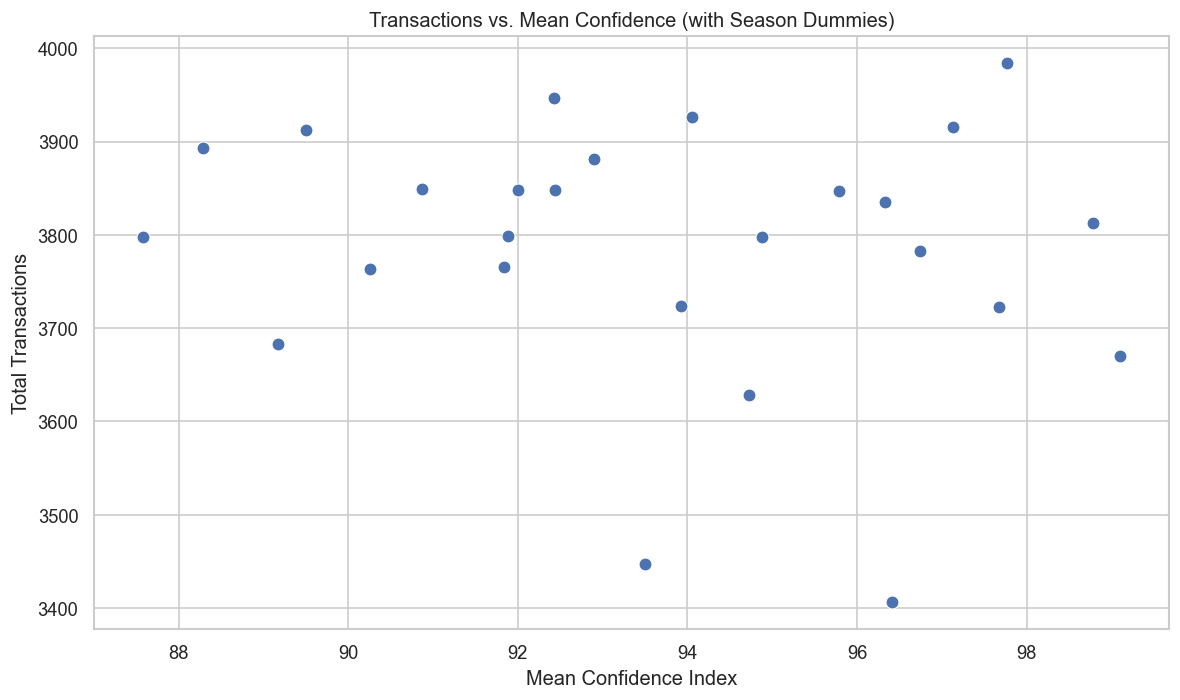

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Aylık özet + sezon
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean"),
          season=("season", lambda x: x.mode()[0])
      )
      .reset_index()
)

# 2023-03 çıkar
monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

# Dummy kodlama
monthly_summary = pd.get_dummies(monthly_summary, columns=["season"], drop_first=True)

# Composite index
monthly_summary["mean_confidence"] = (
    monthly_summary["econ_conf"] +
    monthly_summary["cons_conf"] +
    monthly_summary["realsec_conf"]
) / 3

print("\nMonthly summary with season dummies:\n")
print(monthly_summary)

# Model verileri numerik tipte garantiye al
X = sm.add_constant(monthly_summary[["mean_confidence", "season_Summer", "season_Winter"]].astype(float))
y = monthly_summary["total_transactions"].astype(float)

model = sm.OLS(y, X).fit()

print("\nSeason Dummy Regression Summary:\n")
print(model.summary())

# Yorum
pvals = model.pvalues
significant = [k for k,v in pvals.items() if k != "const" and v<0.05]
if significant:
    print(f"\n✅ Significant predictors: {', '.join(significant)}.")
else:
    print("\n❌ No predictors are significant.")

# Grafik
plt.figure(figsize=(10,6), dpi=120)
sns.scatterplot(
    x=monthly_summary["mean_confidence"],
    y=monthly_summary["total_transactions"],
    s=60
)

plt.title("Transactions vs. Mean Confidence (with Season Dummies)")
plt.xlabel("Mean Confidence Index")
plt.ylabel("Total Transactions")
plt.tight_layout()
plt.show()


random forest regression

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Aylık özet + sezon
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean"),
          season=("season", lambda x: x.mode()[0])
      )
      .reset_index()
)

# 2023-03 çıkar
monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

# Dummy kodlama
monthly_summary = pd.get_dummies(monthly_summary, columns=["season"], drop_first=True)

# Composite index
monthly_summary["mean_confidence"] = (
    monthly_summary["econ_conf"] +
    monthly_summary["cons_conf"] +
    monthly_summary["realsec_conf"]
) / 3

# Feature matrix
X = monthly_summary[[
    "econ_conf", 
    "cons_conf", 
    "realsec_conf", 
    "mean_confidence"
] + [c for c in monthly_summary.columns if c.startswith("season_")]].astype(float)

y = monthly_summary["total_transactions"].astype(float)

# Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Cross-validation R2
r2_scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
mean_r2 = np.mean(r2_scores)

# Fit final model
rf.fit(X, y)

# Feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Cross-Validated R2 Scores:", r2_scores)
print("Mean R2:", mean_r2)
print("\nFeature Importances:\n")
print(importance_df)



Random Forest Cross-Validated R2 Scores: [ 0.18441147 -0.02168773 -0.12242744 -0.69729487 -0.35748321]
Mean R2: -0.20289635594897634

Feature Importances:

           Feature  Importance
1        cons_conf    0.353334
2     realsec_conf    0.216144
0        econ_conf    0.193108
3  mean_confidence    0.115912
6    season_Winter    0.095039
4    season_Spring    0.015069
5    season_Summer    0.011394


kerass regression

/Users/ebrarsudedogan/anaconda3/envs/Data_Mining_Conda/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/Users/ebrarsudedogan/anaconda3/envs/Data_Mining_Conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test MSE: 14784316.00
Test MAE: 3844.08
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test R2: -2032.1012


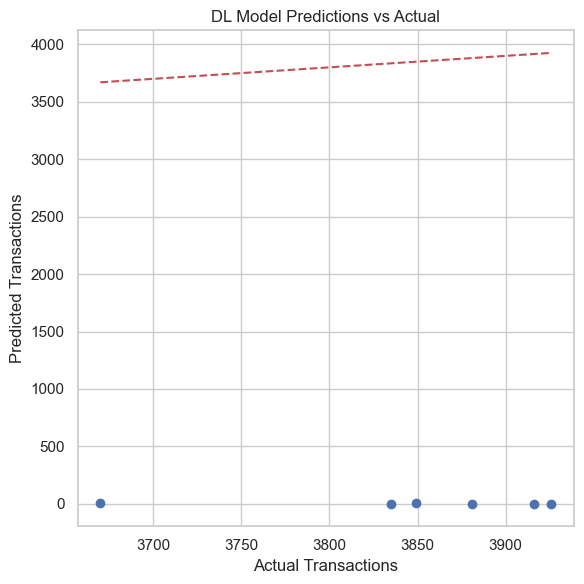

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Aylık summary
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# 2023-03 çıkar
monthly_summary = monthly_summary[monthly_summary["month"] != "2023-03"]

# Composite index
monthly_summary["mean_confidence"] = (
    monthly_summary["econ_conf"] +
    monthly_summary["cons_conf"] +
    monthly_summary["realsec_conf"]
) / 3

# X, y
X = monthly_summary[["econ_conf", "cons_conf", "realsec_conf", "mean_confidence"]].astype(float)
y = monthly_summary["total_transactions"].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    verbose=0,
    validation_data=(X_test_scaled, y_test)
)

# Evaluate
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest MSE: {loss:.2f}")
print(f"Test MAE: {mae:.2f}")

# Predictions
y_pred = model.predict(X_test_scaled).flatten()
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
print(f"Test R2: {r2:.4f}")

# (Opsiyonel) Tahmin vs Gerçek
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Transactions")
plt.ylabel("Predicted Transactions")
plt.title("DL Model Predictions vs Actual")
plt.tight_layout()
plt.show()


In [42]:
import yfinance as yf
import pandas as pd

# Dolar/TL
usd = yf.download("USDTRY=X", start="2021-01-01", end="2024-01-01", interval="1d")["Close"]

# Euro/TL
eur = yf.download("EURTRY=X", start="2021-01-01", end="2024-01-01", interval="1d")["Close"]

# Dataframe
fx_df = pd.DataFrame(index=usd.index)
fx_df["usd"] = usd
fx_df["eur"] = eur

# Aylık ortalama
fx_df["month"] = fx_df.index.to_period("M")
fx_monthly = fx_df.groupby("month").mean().reset_index()

print(fx_monthly)


/var/folders/tw/ngdtxtj50klg2qdy83nmydxh0000gn/T/ipykernel_3994/2910272073.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd = yf.download("USDTRY=X", start="2021-01-01", end="2024-01-01", interval="1d")["Close"]
[*********************100%***********************]  1 of 1 completed
/var/folders/tw/ngdtxtj50klg2qdy83nmydxh0000gn/T/ipykernel_3994/2910272073.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eur = yf.download("EURTRY=X", start="2021-01-01", end="2024-01-01", interval="1d")["Close"]
[*********************100%***********************]  1 of 1 completed

      month        usd        eur
0   2021-01   7.400627   9.014022
1   2021-02   7.084782   8.572331
2   2021-03   7.679289   9.142648
3   2021-04   8.165467   9.763095
4   2021-05   8.372642  10.161635
5   2021-06   8.619926  10.392120
6   2021-07   8.602895  10.172563
7   2021-08   8.473810   9.970865
8   2021-09   8.535516  10.051412
9   2021-10   9.188431  10.658620
10  2021-11  10.607884  12.088088
11  2021-12  13.366420  15.099254
12  2022-01  13.507523  15.263392
13  2022-02  13.609162  15.421120
14  2022-03  14.556328  16.043909
15  2022-04  14.695496  15.907370
16  2022-05  15.565809  16.447871
17  2022-06  16.959888  17.906541
18  2022-07  17.398912  17.707941
19  2022-08  18.007230  18.223027
20  2022-09  18.298036  18.126351
21  2022-10  18.569521  18.256694
22  2022-11  18.586549  18.922425
23  2022-12  18.641295  19.710295
24  2023-01  18.765020  20.216952
25  2023-02  18.843263  20.195404
26  2023-03  18.994885  20.331505
27  2023-04  19.330582  21.179284
28  2023-05  1

In [44]:
from scipy.stats import pearsonr

# 2023-03'ten sonrası gereksiz, monthly_summary'da yok
fx_monthly_clean = fx_monthly[fx_monthly["month"] <= "2023-02"]

# Merge
df_merged = pd.merge(
    monthly_summary,
    fx_monthly_clean,
    on="month",
    how="inner"
)

print(df_merged[["month", "econ_conf", "cons_conf", "realsec_conf", "usd", "eur"]])

# Korelasyonlar
print("\nKorelasyonlar:\n")
for var in ["usd", "eur"]:
    for conf in ["econ_conf", "cons_conf", "realsec_conf"]:
        r, p = pearsonr(df_merged[var], df_merged[conf])
        print(f"{var.upper()} vs {conf}: r = {r:.3f}, p = {p:.3f}")


      month  econ_conf  cons_conf  realsec_conf        usd        eur
0   2021-01    96.7034    83.2669         109.0   7.400627   9.014022
1   2021-02    96.0306    84.5152         108.7   7.084782   8.572331
2   2021-03    99.4866    86.6538         110.2   7.679289   9.142648
3   2021-04    94.2098    80.1716         107.4   8.165467   9.763095
4   2021-05    92.9693    77.2622         107.1   8.372642  10.161635
5   2021-06    98.7069    81.7228         109.8   8.619926  10.392120
6   2021-07   101.7160    79.4772         112.1   8.602895  10.172563
7   2021-08   102.5933    78.2191         112.2   8.473810   9.970865
8   2021-09   104.3462    79.6503         113.3   8.535516  10.051412
9   2021-10   103.3183    76.7812         111.3   9.188431  10.658620
10  2021-11   101.4827    71.1483         112.0  10.607884  12.088088
11  2021-12    99.6648    68.9133         110.1  13.366420  15.099254
12  2022-01   102.2663    73.2100         111.9  13.507523  15.263392
13  2022-02    99.45

kategori bazında regression analizi

In [47]:
import pandas as pd
from scipy.stats import pearsonr

# Sonuçları saklamak için liste
results = []

# Tüm benzersiz kategoriler
categories = df["category"].unique()

# Hepsini string yapalım
monthly_summary["month"] = monthly_summary["month"].astype(str)

for cat in categories:
    df_cat = df[df["category"] == cat].copy()
    df_cat["month"] = pd.to_datetime(df_cat["invoice_date"]).dt.to_period("M").astype(str)
    
    cat_monthly = (
        df_cat.groupby("month")
        .agg(total_transactions=("invoice_no", "count"))
        .reset_index()
    )
    
    merge_df = pd.merge(
        cat_monthly,
        monthly_summary[["month", "econ_conf"]],
        on="month",
        how="inner"
    )
    
    # Eğer veri yoksa skip
    if merge_df.empty or merge_df["total_transactions"].nunique() <=1:
        continue
    
    r, p = pearsonr(merge_df["econ_conf"], merge_df["total_transactions"])
    
    results.append({
        "category": cat,
        "r": r,
        "p": p
    })

# Dataframe'e çevir
res_df = pd.DataFrame(results)

# p değeri küçükten büyüğe sırala
res_df = res_df.sort_values("p").reset_index(drop=True)

# Bastır
print("\nKATEGORİ BAZLI KORELASYON SONUÇLARI:\n")
for _, row in res_df.iterrows():
    signif = "✅ anlamlı" if row["p"]<0.05 else "❌ anlamsız"
    print(f"{row['category']:15} | r = {row['r']:.3f}, p = {row['p']:.3f} -> {signif}")



KATEGORİ BAZLI KORELASYON SONUÇLARI:

Technology      | r = 0.410, p = 0.038 -> ✅ anlamlı
Books           | r = -0.293, p = 0.147 -> ❌ anlamsız
Toys            | r = 0.199, p = 0.331 -> ❌ anlamsız
Shoes           | r = -0.168, p = 0.411 -> ❌ anlamsız
Clothing        | r = 0.076, p = 0.712 -> ❌ anlamsız
Food & Beverage | r = -0.069, p = 0.737 -> ❌ anlamsız
Souvenir        | r = -0.050, p = 0.810 -> ❌ anlamsız
Cosmetics       | r = 0.040, p = 0.848 -> ❌ anlamsız


k means clustering - transaction    

K-Means Price Segmentation (Category: Clothing)
Inertia=3445.80, Silhouette=0.73


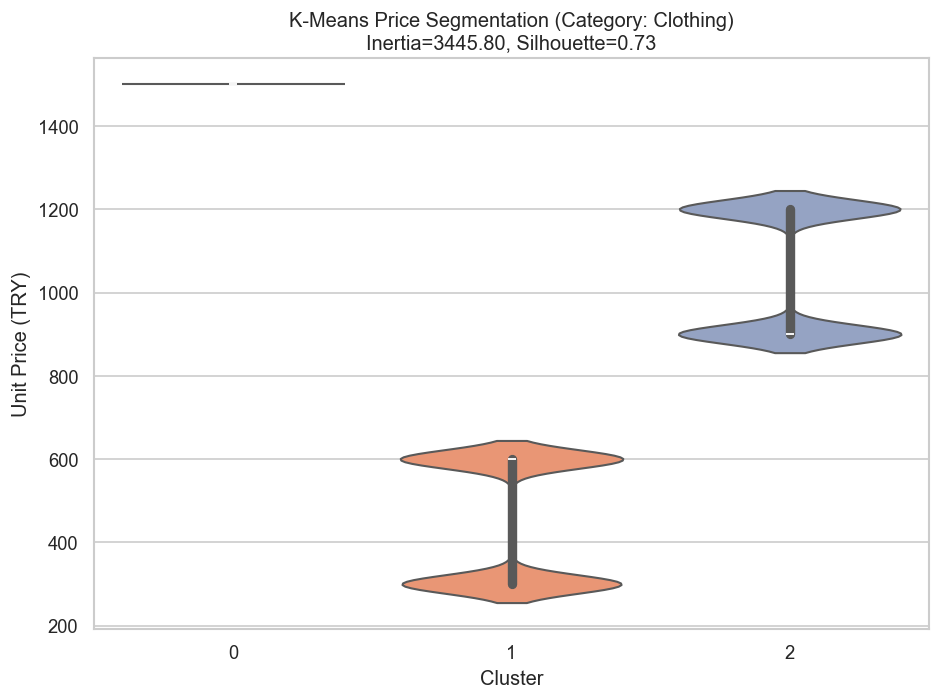

K-Means Price Segmentation (Category: Shoes)
Inertia=1011.08, Silhouette=0.73


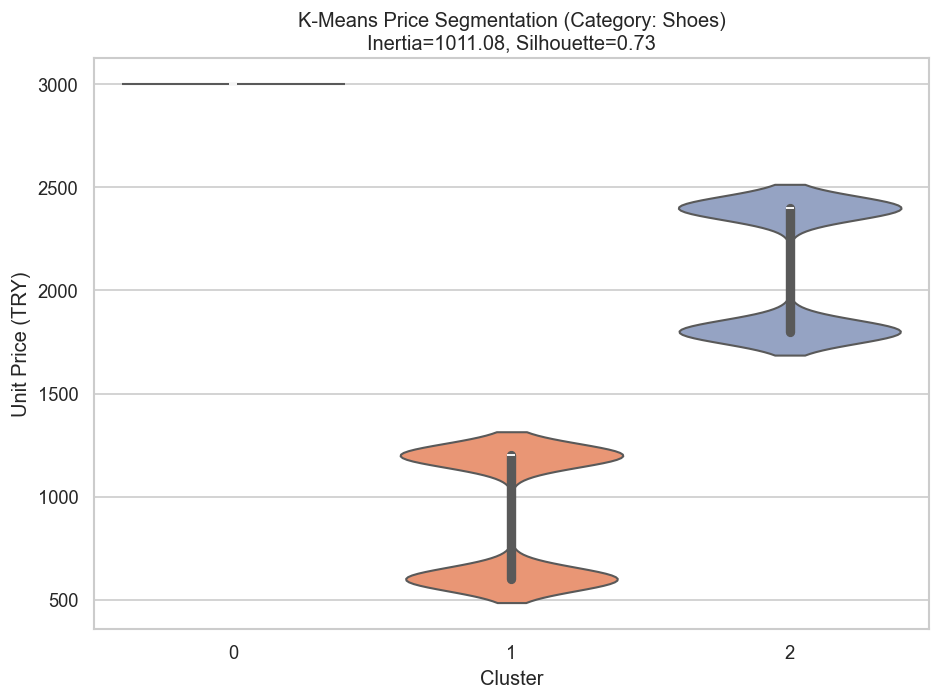

K-Means Price Segmentation (Category: Books)
Inertia=494.27, Silhouette=0.70


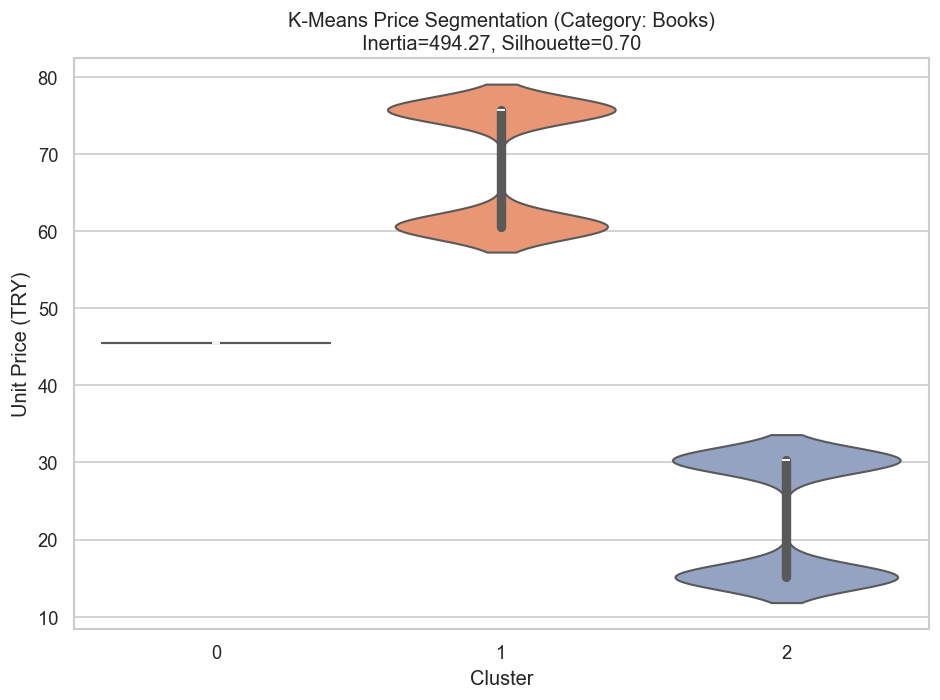

K-Means Price Segmentation (Category: Cosmetics)
Inertia=1505.47, Silhouette=0.70


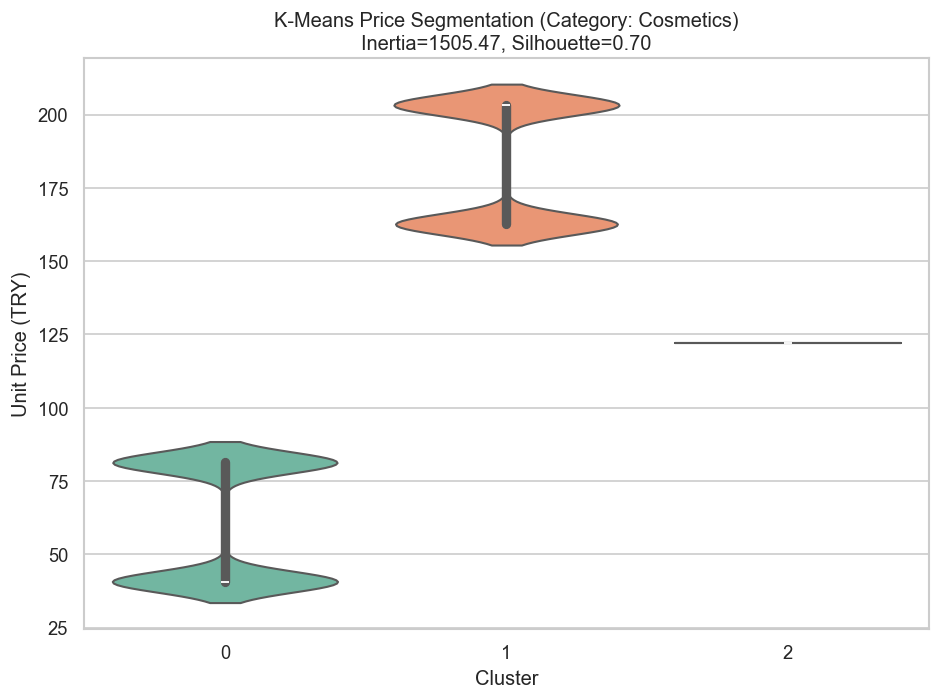

K-Means Price Segmentation (Category: Food & Beverage)
Inertia=1461.24, Silhouette=0.73


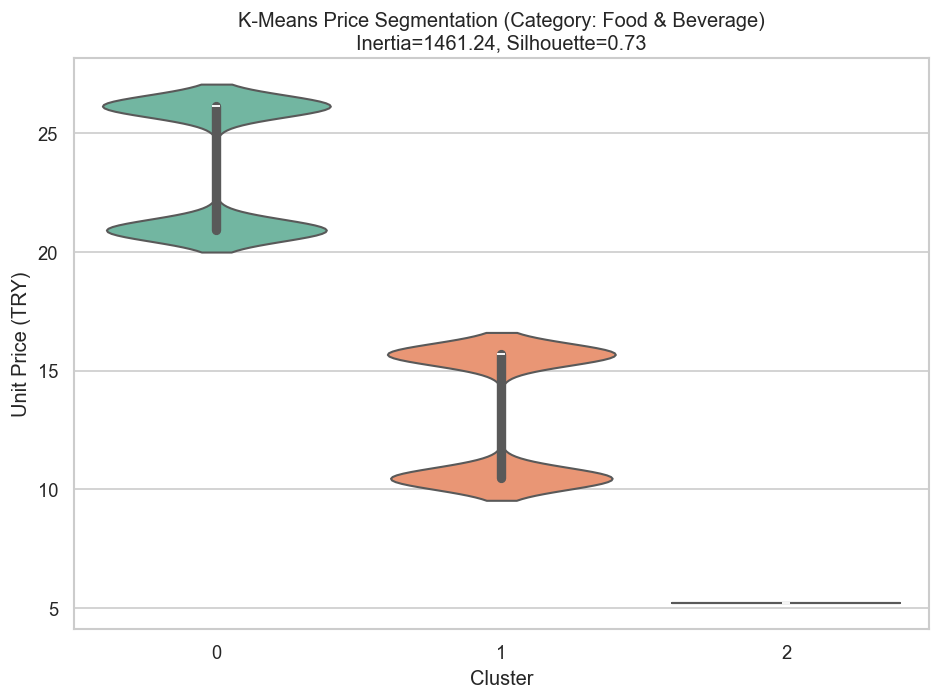

K-Means Price Segmentation (Category: Toys)
Inertia=1013.10, Silhouette=0.70


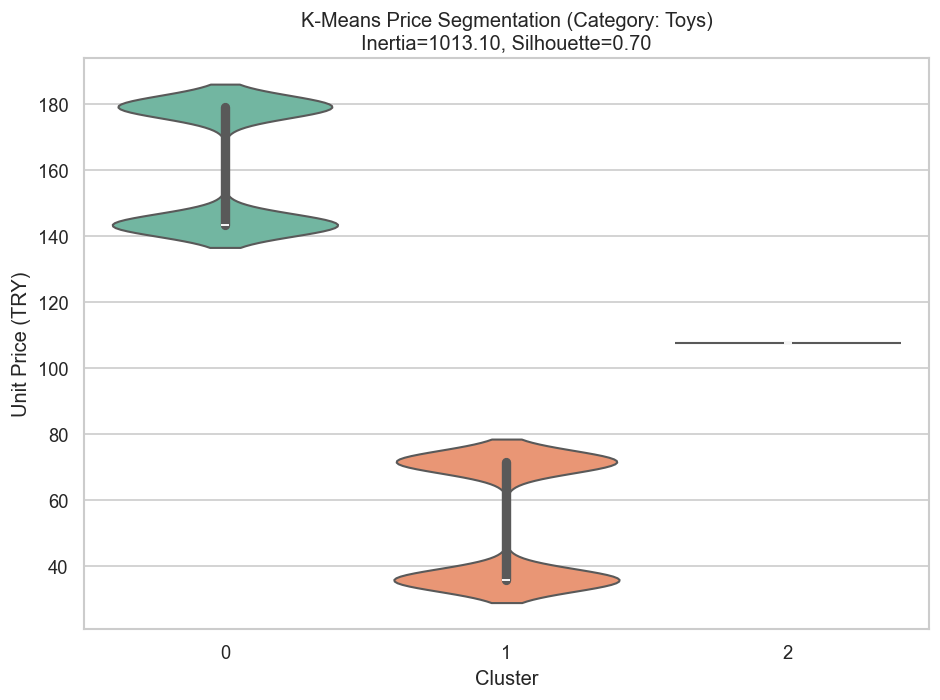

K-Means Price Segmentation (Category: Technology)
Inertia=500.73, Silhouette=0.70


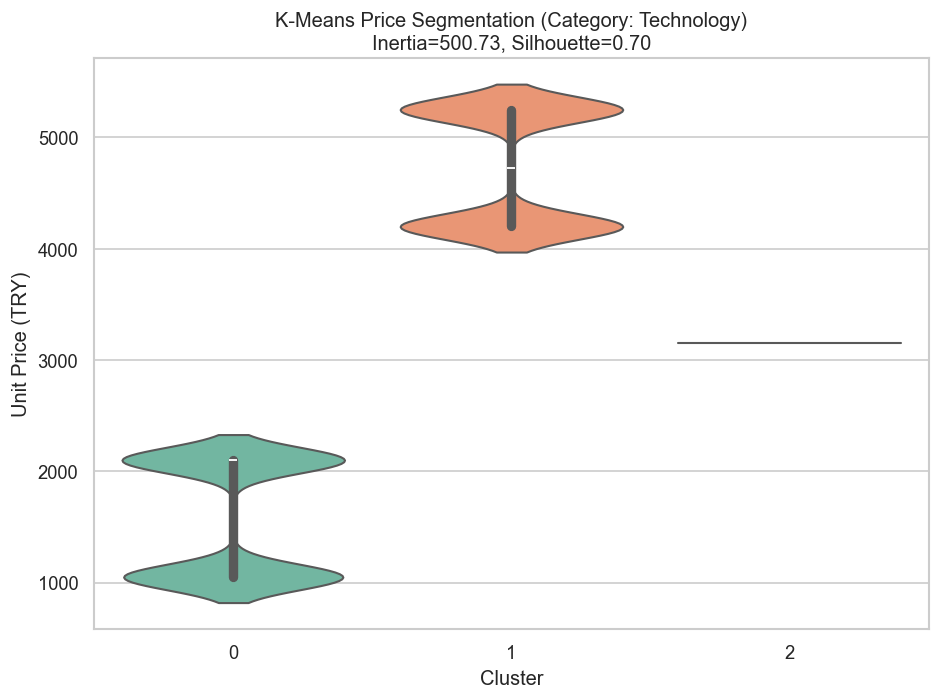

K-Means Price Segmentation (Category: Souvenir)
Inertia=491.36, Silhouette=0.71


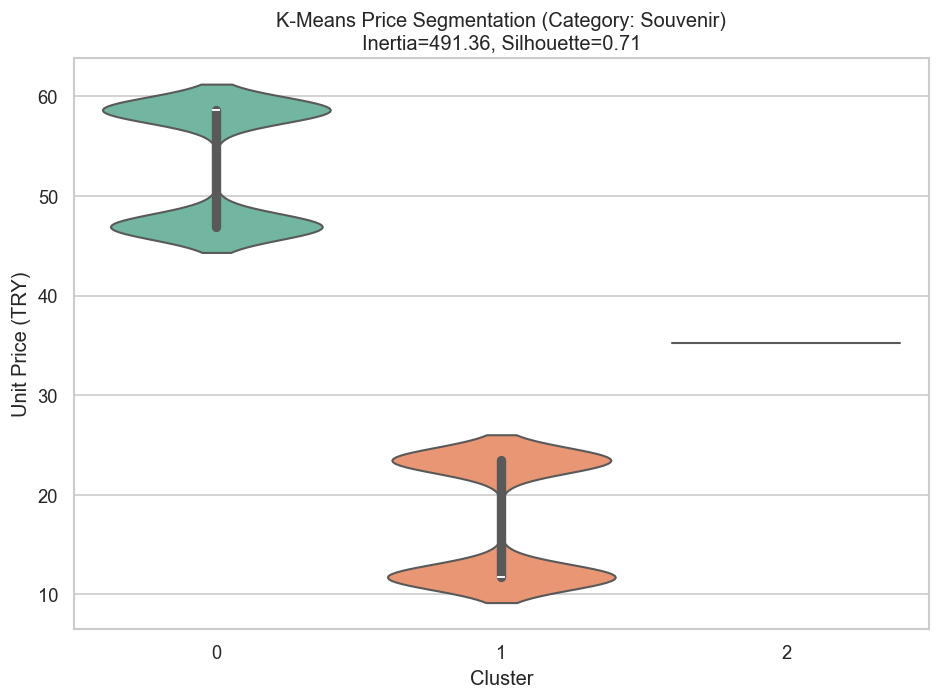

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

categories = df["category"].unique()

for cat in categories:
    df_cat = df[df["category"] == cat].copy()
    
    # Feature: price only
    X = df_cat[["price"]]
    
    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # KMeans
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    df_cat["cluster"] = labels
    
    # Clustering quality
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    
    # Violin plot
    plt.figure(figsize=(8,6), dpi=120)
    sns.violinplot(
        data=df_cat,
        x="cluster",
        y="price",
        hue="cluster",
        palette="Set2",
        dodge=False,
        legend=False
    )
    plt.title(f"K-Means Price Segmentation (Category: {cat})\nInertia={inertia:.2f}, Silhouette={silhouette:.2f}")
    print(f"K-Means Price Segmentation (Category: {cat})\nInertia={inertia:.2f}, Silhouette={silhouette:.2f}")
    plt.xlabel("Cluster")
    plt.ylabel("Unit Price (TRY)")
    plt.tight_layout()
    plt.show()


cluster ile ekonomik

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

categories = df["category"].unique()

# Economic confidence verisi
econ_df = monthly_summary[["month", "econ_conf"]].copy()
econ_df["month"] = econ_df["month"].astype(str)

for cat in categories:
    df_cat = df[df["category"] == cat].copy()
    
    # Feature: price only
    X = df_cat[["price"]]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # KMeans
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    df_cat["cluster"] = labels
    
    # Aylık transaction count
    df_cat["month"] = pd.to_datetime(df_cat["invoice_date"]).dt.to_period("M").astype(str)
    monthly_counts = (
        df_cat.groupby(["month", "cluster"])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )
    
    # Merge economic confidence
    merged = pd.merge(monthly_counts, econ_df, on="month", how="inner")
    
    # Her cluster için korelasyon ve plot
    for cl in sorted(df_cat["cluster"].unique()):
        y = merged[cl]
        x = merged["econ_conf"]
        r, p = pearsonr(x, y)
        
        # Otomatik yorum
        if p < 0.05:
            comment = "✅ Statistically significant."
        else:
            comment = "❌ Not significant."
        
        # Print results
        print(f"\nKategori: {cat} | Cluster {cl}")
        print(f"Pearson r = {r:.3f}, p = {p:.3f}")
        print(comment)
        



Kategori: Clothing | Cluster 0
Pearson r = 0.090, p = 0.661
❌ Not significant.

Kategori: Clothing | Cluster 1
Pearson r = -0.033, p = 0.872
❌ Not significant.

Kategori: Clothing | Cluster 2
Pearson r = 0.006, p = 0.975
❌ Not significant.

Kategori: Clothing | Cluster 3
Pearson r = -0.002, p = 0.994
❌ Not significant.

Kategori: Clothing | Cluster 4
Pearson r = 0.189, p = 0.355
❌ Not significant.

Kategori: Shoes | Cluster 0
Pearson r = -0.326, p = 0.104
❌ Not significant.

Kategori: Shoes | Cluster 1
Pearson r = -0.132, p = 0.520
❌ Not significant.

Kategori: Shoes | Cluster 2
Pearson r = 0.087, p = 0.672
❌ Not significant.

Kategori: Shoes | Cluster 3
Pearson r = -0.230, p = 0.259
❌ Not significant.

Kategori: Shoes | Cluster 4
Pearson r = 0.103, p = 0.615
❌ Not significant.

Kategori: Books | Cluster 0
Pearson r = -0.283, p = 0.161
❌ Not significant.

Kategori: Books | Cluster 1
Pearson r = -0.307, p = 0.127
❌ Not significant.

Kategori: Books | Cluster 2
Pearson r = -0.005, p = 0

transaction count

category
quantity
price
total_price
shopping_mall
season
is_weekday
is_holiday
invoice_date


In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

# 1️⃣ Data Selection
transaction_features = df[[
    "category", 
    "quantity", 
    "price", 
    "total_price",
    "shopping_mall", 
    "season", 
    "is_weekday", 
    "is_holiday", 
    "invoice_date"
]].copy()

# 2️⃣ Invoice date to ordinal numeric (e.g., YYYYMM)
transaction_features["invoice_date"] = pd.to_datetime(transaction_features["invoice_date"])
transaction_features["invoice_month"] = transaction_features["invoice_date"].dt.year * 100 + transaction_features["invoice_date"].dt.month
transaction_features.drop("invoice_date", axis=1, inplace=True)

# 3️⃣ One-Hot Encoding for categoricals
categorical_cols = ["category", "shopping_mall", "season"]
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(transaction_features[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=transaction_features.index)

# 4️⃣ Combine with numeric columns
numeric_cols = ["quantity", "price", "total_price", "is_weekday", "is_holiday", "invoice_month"]
full_df = pd.concat([transaction_features[numeric_cols], encoded_df], axis=1)

# 5️⃣ Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_df)

# 6️⃣ Try KMeans with different cluster numbers
k_range = [3, 4, 5]
results = []

print("\nKMeans Clustering Results:\n")

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(scaled_data, labels)
    results.append((k, inertia, silhouette))
    print(f"k = {k} | Inertia = {inertia:.2f} | Silhouette = {silhouette:.4f}")

# 7️⃣ Select best k (highest silhouette)
best_k = max(results, key=lambda x: x[2])[0]
print(f"\n✅ Best k selected: {best_k}\n")

# 8️⃣ Fit final KMeans
final_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
final_labels = final_kmeans.fit_predict(scaled_data)

# 9️⃣ Append cluster labels to original data
df["transaction_cluster"] = final_labels

# 1️⃣0️⃣ Cluster summaries
summary = df.groupby("transaction_cluster").agg(
    avg_quantity=("quantity", "mean"),
    avg_unit_price=("price", "mean"),
    avg_total_price=("total_price", "mean"),
    count=("invoice_no", "count")
).reset_index()

print("\nCluster Summary:\n")
print(summary)

# 1️⃣1️⃣ Show sample rows for sanity check
print("\nSample Transactions with Cluster Labels:\n")
print(df[["invoice_no", "category", "shopping_mall", "price", "total_price", "transaction_cluster"]].head(10))



KMeans Clustering Results:

k = 3 | Inertia = 2426054.59 | Silhouette = 0.0902
k = 4 | Inertia = 2312869.14 | Silhouette = 0.0872
k = 5 | Inertia = 2228652.95 | Silhouette = 0.0906

✅ Best k selected: 5


Cluster Summary:

   transaction_cluster  avg_quantity  avg_unit_price  avg_total_price  count
0                    0      2.975919      579.867930      2088.451576   4817
1                    1      3.011467     1106.173369      4061.871828  30434
2                    2      2.981835      552.851880      2018.412643  25434
3                    3      3.011246       71.528248       262.723100  33880
4                    4      3.038635     3190.566231     11772.148406   4892

Sample Transactions with Cluster Labels:

  invoice_no   category     shopping_mall    price  total_price  \
0    I138884   Clothing            Kanyon  1500.40      7502.00   
1    I317333      Shoes    Forum Istanbul  1800.51      5401.53   
2    I127801   Clothing         Metrocity   300.08       300.08   
3  


🟢 Cluster 0

econ_conf: r = -0.098, p = 0.6274 | ❌ Not significant
cons_conf: r = -0.057, p = 0.7776 | ❌ Not significant
realsec_conf: r = 0.078, p = 0.6974 | ❌ Not significant

OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:     total_transactions   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.3290
Date:                Sat, 28 Jun 2025   Prob (F-statistic):              0.804
Time:                        21:15:30   Log-Likelihood:                -129.17
No. Observations:                  27   AIC:                             266.3
Df Residuals:                      23   BIC:                             271.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
      

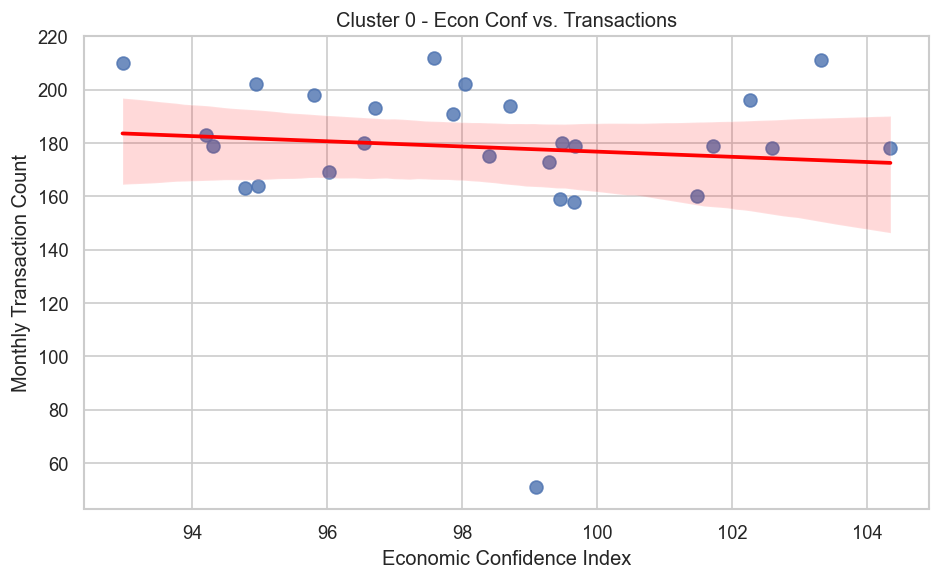


🟢 Cluster 1

econ_conf: r = -0.024, p = 0.9060 | ❌ Not significant
cons_conf: r = -0.200, p = 0.3177 | ❌ Not significant
realsec_conf: r = 0.189, p = 0.3452 | ❌ Not significant

OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:     total_transactions   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9475
Date:                Sat, 28 Jun 2025   Prob (F-statistic):              0.434
Time:                        21:15:30   Log-Likelihood:                -175.68
No. Observations:                  27   AIC:                             359.4
Df Residuals:                      23   BIC:                             364.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
      

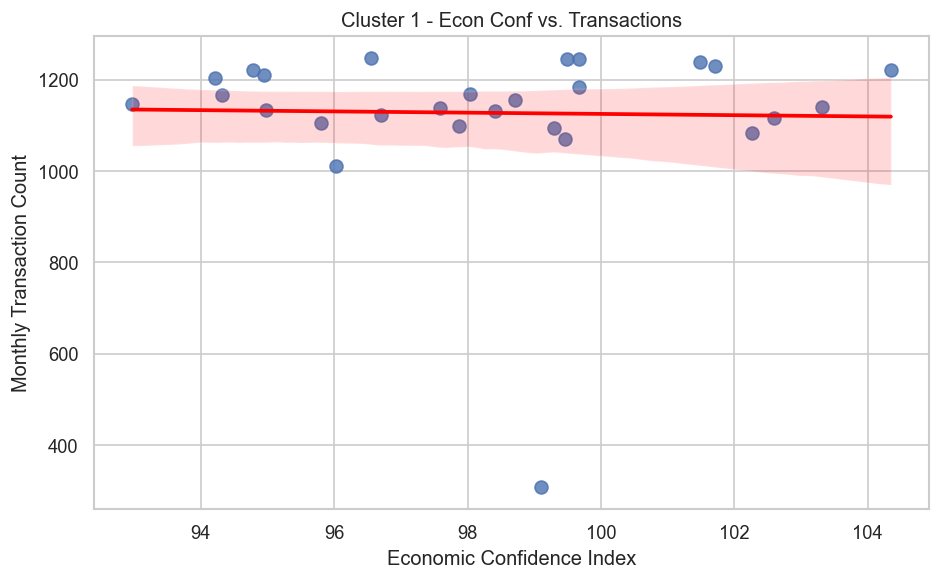


🟢 Cluster 2

econ_conf: r = -0.042, p = 0.8369 | ❌ Not significant
cons_conf: r = -0.140, p = 0.4863 | ❌ Not significant
realsec_conf: r = 0.093, p = 0.6437 | ❌ Not significant

OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:     total_transactions   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.3478
Date:                Sat, 28 Jun 2025   Prob (F-statistic):              0.791
Time:                        21:15:30   Log-Likelihood:                -175.58
No. Observations:                  27   AIC:                             359.2
Df Residuals:                      23   BIC:                             364.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
      

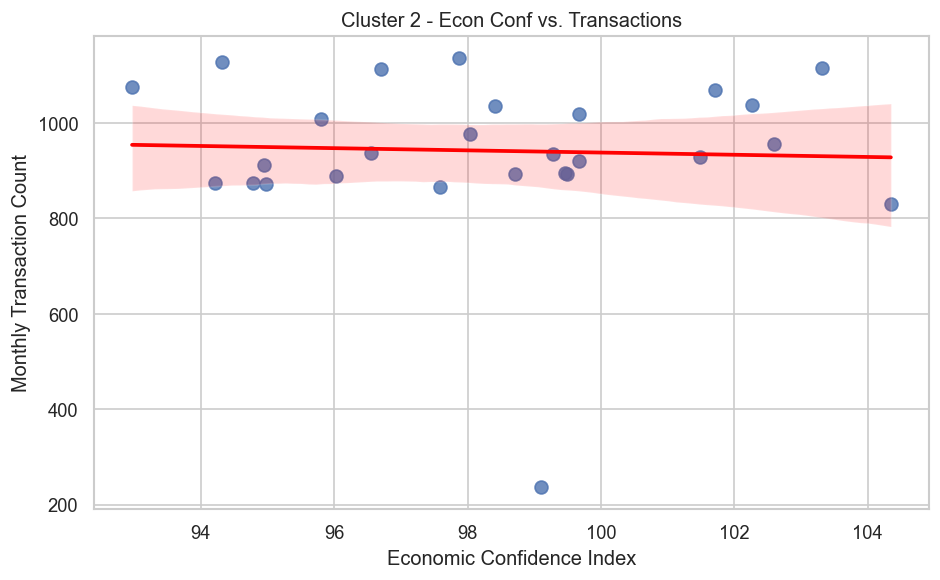


🟢 Cluster 3

econ_conf: r = -0.072, p = 0.7222 | ❌ Not significant
cons_conf: r = -0.229, p = 0.2507 | ❌ Not significant
realsec_conf: r = 0.095, p = 0.6388 | ❌ Not significant

OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:     total_transactions   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.7204
Date:                Sat, 28 Jun 2025   Prob (F-statistic):              0.550
Time:                        21:15:30   Log-Likelihood:                -179.13
No. Observations:                  27   AIC:                             366.3
Df Residuals:                      23   BIC:                             371.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
      

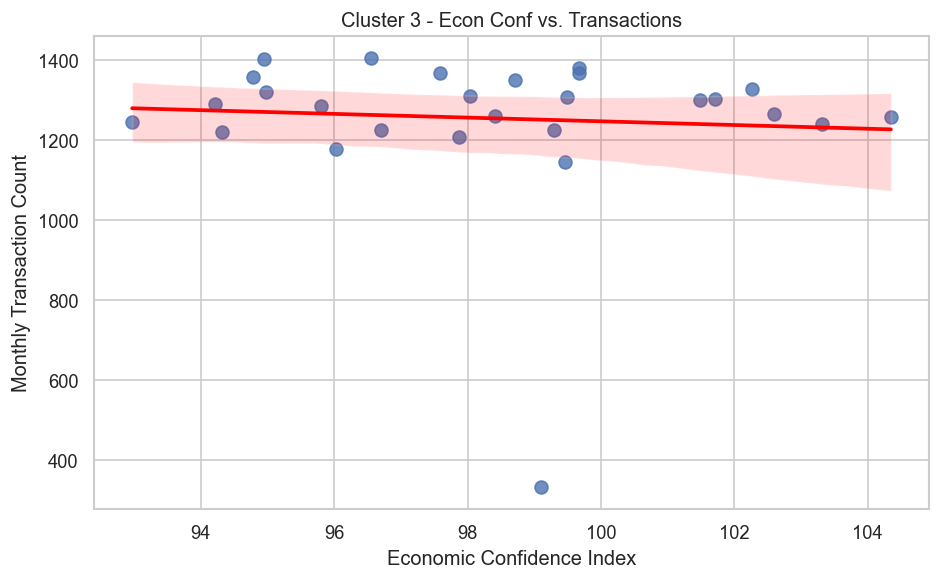


🟢 Cluster 4

econ_conf: r = 0.134, p = 0.5050 | ❌ Not significant
cons_conf: r = -0.120, p = 0.5522 | ❌ Not significant
realsec_conf: r = 0.089, p = 0.6605 | ❌ Not significant

OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:     total_transactions   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.3407
Date:                Sat, 28 Jun 2025   Prob (F-statistic):              0.796
Time:                        21:15:30   Log-Likelihood:                -130.12
No. Observations:                  27   AIC:                             268.2
Df Residuals:                      23   BIC:                             273.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
       

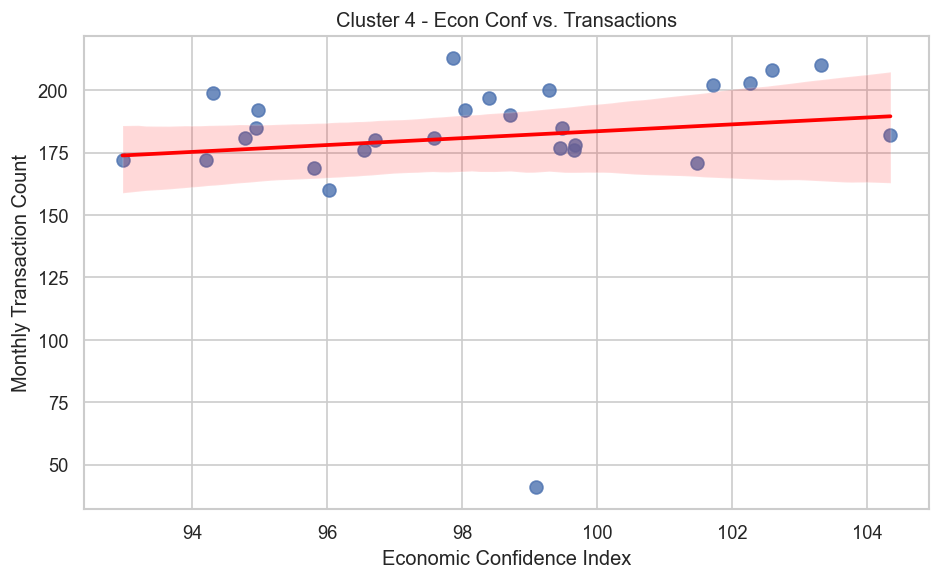

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

# 1️⃣ Ay sütunu hazırla
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M").astype(str)

# 2️⃣ Ay bazlı endeks ortalamaları
monthly_endeks = (
    df.groupby("month")
      .agg(
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# 3️⃣ Cluster bazlı aylık işlem sayısı
monthly_counts = (
    df.groupby(["month", "transaction_cluster"])
      .agg(total_transactions=("invoice_no", "count"))
      .reset_index()
)

# 4️⃣ Merge
full_df = pd.merge(
    monthly_counts,
    monthly_endeks,
    on="month",
    how="left"
)

# 5️⃣ Analiz: Her cluster için
clusters = full_df["transaction_cluster"].unique()
clusters.sort()

for clust in clusters:
    data = full_df[full_df["transaction_cluster"] == clust]

    print(f"\n🟢 Cluster {clust}\n")

    # Korelasyon
    for col in ["econ_conf", "cons_conf", "realsec_conf"]:
        r, p = pearsonr(data[col], data["total_transactions"])
        sig = "✅ Significant" if p < 0.05 else "❌ Not significant"
        print(f"{col}: r = {r:.3f}, p = {p:.4f} | {sig}")

    # OLS regresyon
    X = sm.add_constant(data[["econ_conf", "cons_conf", "realsec_conf"]])
    y = data["total_transactions"]
    model = sm.OLS(y, X).fit()
    print("\nOLS Regression Summary:\n")
    print(model.summary())

    # Scatter plot (econ_conf)
    plt.figure(figsize=(8,5), dpi=120)
    sns.regplot(
        x="econ_conf",
        y="total_transactions",
        data=data,
        scatter_kws={"s": 60},
        line_kws={"color": "red"}
    )
    plt.title(f"Cluster {clust} - Econ Conf vs. Transactions")
    plt.xlabel("Economic Confidence Index")
    plt.ylabel("Monthly Transaction Count")
    plt.tight_layout()
    plt.show()


customer segment

gender
age
category
payment_method
total_price
shopping_mall
season
is_weekday
is_holiday
invoice_date

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

# invoice_date'i datetime yap
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

# Müşteri bazlı aggregation
customer_df = (
    df.groupby("customer_id")
    .agg({
        "gender": "first",
        "age": "first",
        "category": lambda x: x.mode()[0],
        "payment_method": lambda x: x.mode()[0],
        "shopping_mall": lambda x: x.mode()[0],
        "is_weekday": "mean",
        "is_holiday": "mean",
        "season": lambda x: x.mode()[0],
        "total_price": "sum",
        "invoice_date": lambda x: x.max().month + (x.max().year - 2021)*12
    })
    .reset_index()
)

# Encode categorical variables
cat_cols = ["gender", "category", "payment_method", "shopping_mall", "season"]
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(customer_df[cat_cols])

# Numeric features
num_cols = ["age", "is_weekday", "is_holiday", "total_price", "invoice_date"]
num_data = customer_df[num_cols].values

# Concatenate
X = pd.concat([
    pd.DataFrame(encoded_cats, index=customer_df.index),
    pd.DataFrame(num_data, index=customer_df.index)
], axis=1)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df["customer_cluster"] = kmeans.fit_predict(X_scaled)

# Cluster summary
summary = (
    customer_df.groupby("customer_cluster")
    .agg(
        avg_age=("age", "mean"),
        avg_total_spent=("total_price", "mean"),
        count=("customer_id", "count")
    )
    .reset_index()
)

print("Customer Cluster Summary:\n")
print(summary)

# Sample customers
print("\nSample Customers:\n")
print(customer_df.head(10))


Customer Cluster Summary:

   customer_cluster    avg_age  avg_total_spent  count
0                 0  43.544038      2670.483978   4814
1                 1  43.541859       167.547260   4981
2                 2  43.406942      4801.007127  28090
3                 3  43.366850      2672.572592  35903
4                 4  43.489189       272.775235  25669

Sample Customers:

  customer_id  gender  age         category payment_method     shopping_mall  \
0     C100004    Male   61         Clothing    Credit Card         Metrocity   
1     C100005    Male   34            Shoes           Cash            Kanyon   
2     C100006    Male   44             Toys    Credit Card       Cevahir AVM   
3     C100012    Male   25  Food & Beverage           Cash            Kanyon   
4     C100019  Female   21             Toys    Credit Card         Metrocity   
5     C100025    Male   55             Toys     Debit Card         Metrocity   
6     C100028  Female   21            Books           Cash     

In [7]:
import pandas as pd
from scipy.stats import pearsonr
# invoice_date varsa df içinde
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M").astype(str)

# Her ayın unique endeks değerlerini almak için
monthly_summary = (
    df.groupby("month")
    .agg(
        econ_conf=("Econ_Conf", "mean"),
        cons_conf=("Cons_Conf", "mean"),
        realsec_conf=("RealSec_Conf", "mean")
    )
    .reset_index()
)


# Customer_cluster ekle
df_merged = df.merge(
    customer_df[["customer_id", "customer_cluster"]],
    on="customer_id",
    how="left",
    suffixes=("", "_cust")
)

# Aylık transaction count pivot
monthly_counts = (
    df_merged.groupby(["month", "customer_cluster"])
      .size()
      .reset_index(name="transaction_count")
      .pivot(index="month", columns="customer_cluster", values="transaction_count")
      .sort_index()
)

# NaN'leri sıfır yap
monthly_counts = monthly_counts.fillna(0)

# Ekonomik endeksleri ekle
monthly_counts = monthly_counts.merge(
    monthly_summary[["month", "econ_conf", "cons_conf", "realsec_conf"]],
    on="month",
    how="left"
)

# Kolon isimlerini string yap
monthly_counts.columns = [str(c) if isinstance(c, int) else c for c in monthly_counts.columns]

# Kontrol
print("\nKontrol: NaN sayısı")
print(monthly_counts.isna().sum())

if monthly_counts.isna().sum().sum() > 0:
    print("\n❗ UYARI: Endekslerde NaN var. Boş aylar olabilir.\n")

# Korelasyon
print("\n📈 Pearson Correlation Results per Customer Cluster:\n")

for col in sorted([c for c in monthly_counts.columns if c.isdigit()]):
    if monthly_counts[col].sum() == 0:
        print(f"🟢 Customer Cluster {col}: Hepsi 0 olduğu için korelasyon hesaplanamaz.\n")
        continue
    for econ in ["econ_conf", "cons_conf", "realsec_conf"]:
        r, p = pearsonr(monthly_counts[col], monthly_counts[econ])
        signif = "✅ Statistically significant." if p < 0.05 else "❌ Not significant."
        print(f"Cluster {col} - {econ}: r = {r:.3f}, p = {p:.4f} | {signif}")
    print()



Kontrol: NaN sayısı
month           0
0               0
1               0
2               0
3               0
4               0
econ_conf       0
cons_conf       0
realsec_conf    0
dtype: int64

📈 Pearson Correlation Results per Customer Cluster:

Cluster 0 - econ_conf: r = 0.045, p = 0.8221 | ❌ Not significant.
Cluster 0 - cons_conf: r = -0.178, p = 0.3744 | ❌ Not significant.
Cluster 0 - realsec_conf: r = 0.121, p = 0.5469 | ❌ Not significant.

Cluster 1 - econ_conf: r = -0.177, p = 0.3775 | ❌ Not significant.
Cluster 1 - cons_conf: r = -0.123, p = 0.5409 | ❌ Not significant.
Cluster 1 - realsec_conf: r = -0.120, p = 0.5509 | ❌ Not significant.

Cluster 2 - econ_conf: r = -0.043, p = 0.8295 | ❌ Not significant.
Cluster 2 - cons_conf: r = -0.178, p = 0.3751 | ❌ Not significant.
Cluster 2 - realsec_conf: r = 0.201, p = 0.3140 | ❌ Not significant.

Cluster 3 - econ_conf: r = -0.027, p = 0.8918 | ❌ Not significant.
Cluster 3 - cons_conf: r = -0.202, p = 0.3126 | ❌ Not significant.
Clus